In [1]:
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date, timedelta
import time


In [2]:
#time which we want to analyze
Y=7. # number of years
dY=52. # intervals of years (supposing equal onboarding probability throughout the year)

#Average € per investors
T=10000 #€ annual NFT cost per company
tokenscale=1000000 #resize € scale

In [3]:
#stuff needed for the program to run

S=int(Y*dY) # number of steps
Years=[0]*S
rev=[0]*S #Total revenue
revtot=[0]*S
for t in range(0,S):
    Years[t]=t/dY #+2022
ly=range(0,int(Y+1)) #Years shown

In [4]:
#N[1-e^(-t*R)]  where N is the total number of companies and R is the probability they join
def model(ind):
    Delay=1+int(ind[2]*dY) #introduce delay
    #clean new arrays
    Inv=[0]*S #new investors
    N=[0]*S #Number of total companies remaining
    rev=[0]*S
    #initialize them
    N[Delay-1]=ind[0]*ind[1] # the possible investors are the percentage on the total companies
    Inv[0]=0
    #global rev
    R=ind[1]/5  #we assume investors decide in the first 5 years equally distributed 
    #every week for the period we want to analise
    for t in range(Delay,S):
        #R=R+(randn()/500)     ## uncomment to add fluctuations
        Inv[t]=round(N[t-1]*R)   #a client either onboards or don't
        N[t]=(N[t-1] - Inv[t])
        rev[t] = Inv[t]*(T/tokenscale) +rev[t-1] #+rev[t-1]  # new clients need an NFT
        for n in range(1,int(Y)): #for every year 
            if t-n*dY > 0:  #if more than one/two/etc year has passed
                for i in range(1,n):
                    rev[t] = Inv[int(t-i*dY)]*(T/tokenscale)  +rev[t-1]#we need to add one NFT for the new clients from 1/2/etc years before
            if t-3*dY > 0:
                R = ind[1]*4.5 
        revtot[t]= revtot[t] +rev[t]
        #R=R + InvTot[t]/10000
        #R=R + N[t]/(1000000)     
    return rev #number of total investors per period of time

In [5]:
def show(array):  #plots
    Chain=model(array)  #calling this refills rev and updates revtot
    return plot(Years, Chain, label=array[3], color=array[4],linewidth=2), scatter(x=int(array[2]*dY)/dY, y = rev[int(array[2]*dY)], color=array[4],s=500,), text(int(array[2]*dY)/dY -0.1,  rev[ int(array[2]*dY)] +1.5,array[3],fontsize=14)

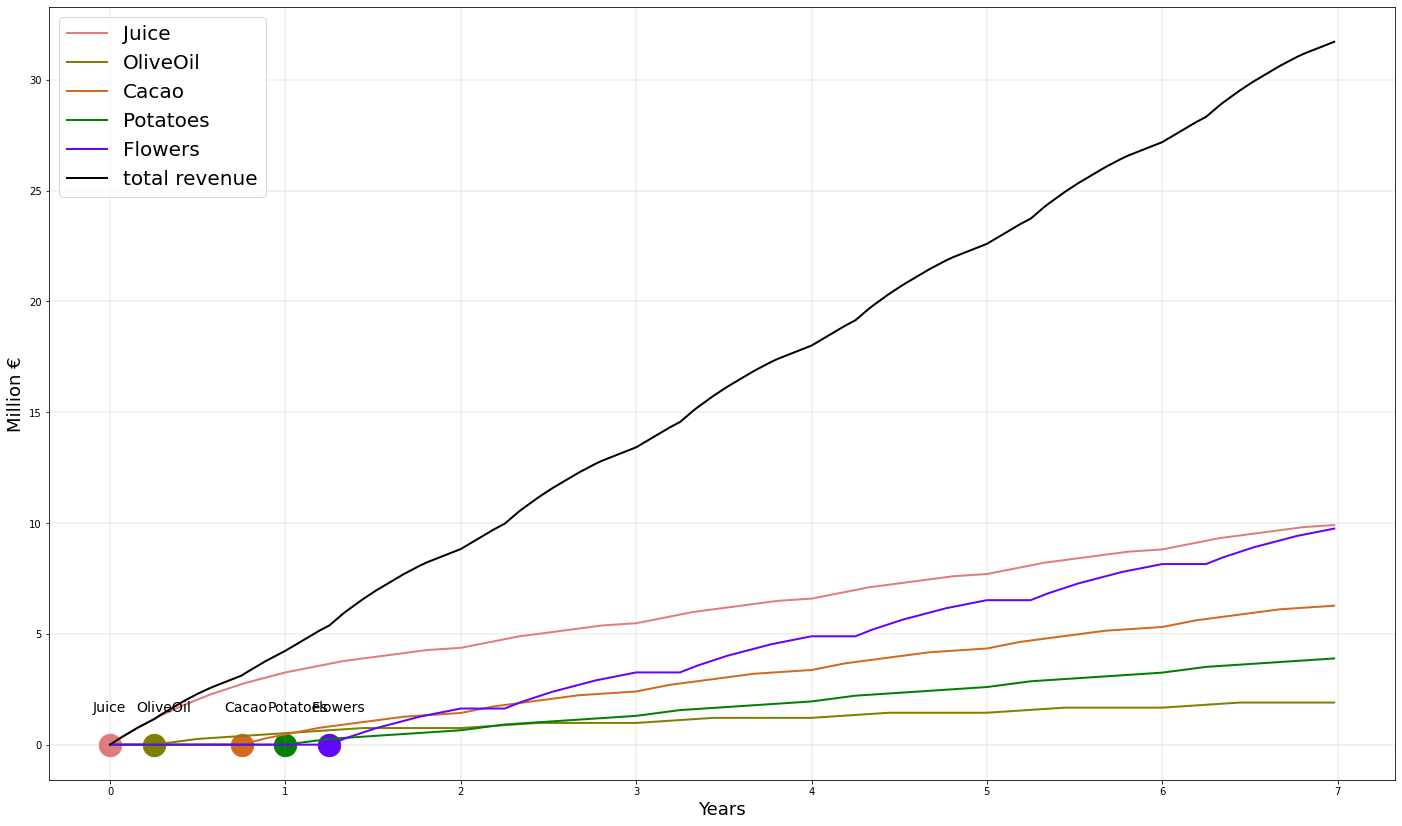

In [6]:
fig=figure(figsize=(20,12))
grid(color='grey', linestyle='-', linewidth=0.2)

Juice        =     [   5000    ,   1/10  ,   0.    ,  'Juice'     ,  '#e07c7c'  ]
OliveOil     =     [   1000    ,   1/10  ,   0.25  ,  'OliveOil'  ,  'olive'    ]
Fish         =     [   15000   ,   1/10  ,   0.50  ,  'Fish'      ,  'violet'   ]
Cacao        =     [   2000    ,   1/10  ,   0.75  ,  'Cacao'     ,  'chocolate']
Floriculture =     [   3000    ,   1/10  ,   1.25  ,  'Flowers'   ,  '#6204ff'  ]
Horticulture =     [   1000    ,   1/10  ,   1.    ,  'Potatoes'       ,  'green'    ]



#reset total revenue
revtot=[0]*S

show(Juice)
show(OliveOil)
#show(Fish)
show(Cacao)
show(Horticulture)
show(Floriculture)

#total revenue plot
plot(Years, revtot, label='total revenue', color='black',linewidth=2)

rc('font', size=24)
xlabel("Years",fontsize=18)
ylabel("Million €",fontsize=18)
YearsShown=ly
xticks(YearsShown)
legend(frameon=True,fontsize=20)
tight_layout()

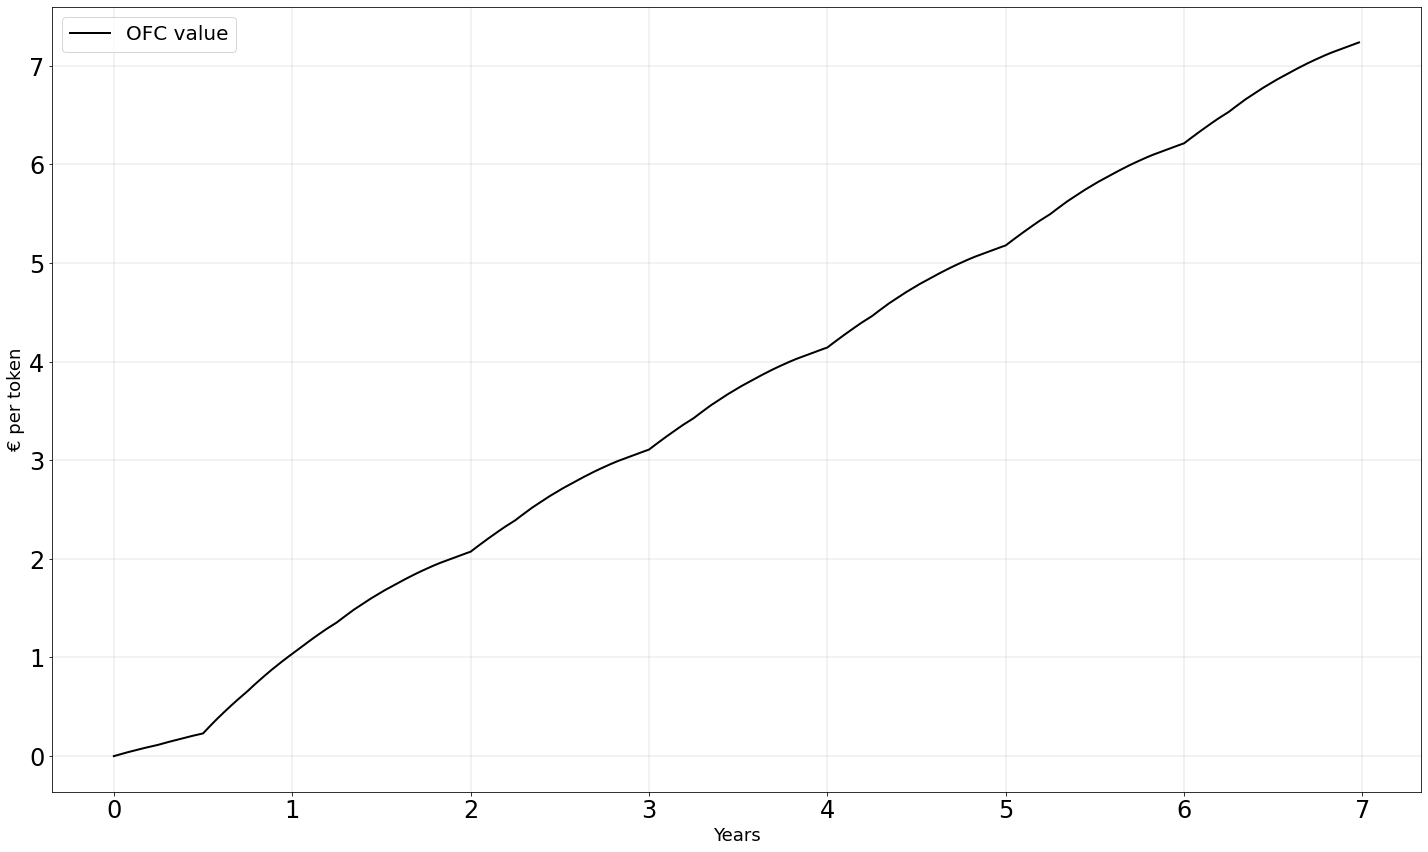

In [7]:
fig=figure(figsize=(20,12))

#OFC Token value if value is backed up by money
OFCN= 10000000 #number of tokens
OFCHOLD=0 #number of token to store
OFCVALUE=[0]*S
for t in range(0,S):
    OFCVALUE[t]=revtot[t]*tokenscale/OFCN   # value of each token
    
    
    
    
    

plot(Years, OFCVALUE, label='OFC value', color='black',linewidth=2)
grid(color='grey', linestyle='-', linewidth=0.2)
rc('font', size=12)
xlabel("Years",fontsize=18)
ylabel("€ per token",fontsize=18)
YearsShown=ly
xticks(YearsShown)
legend(frameon=True,fontsize=20)
tight_layout()

2014-09-14
2031-02-17
[*********************100%***********************]  1 of 1 completed


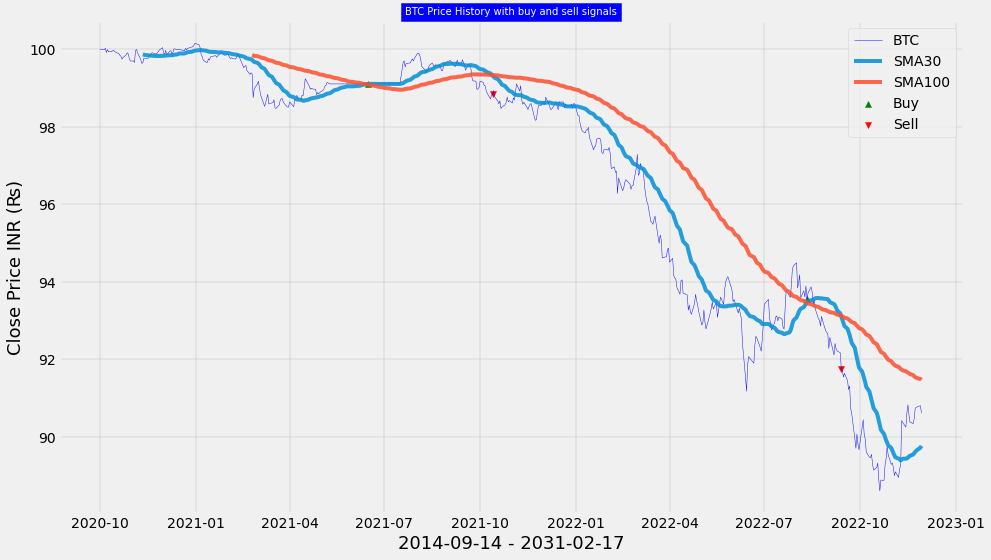

In [18]:
###Buy and sell pressure 
###buy and sell pressure

plt.style.use('fivethirtyeight')
yf.pdr_override()

stocksymbols = ['BTC']  
startdate = date.today() -timedelta(days=3000) #(2017,8,4)
#startdate = date(2018,10,25)
print(startdate)
end_date = date.today() +timedelta(days=3000)
print(end_date)
def getPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data





data = getPortfolio(stocksymbols)
data



data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])





data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data




fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
grid(color='grey', linestyle='-', linewidth=0.2)
plt.tight_layout()
plt.show()




In [9]:
#OFC Token value
OFCN= 10000000 #number of tokens
OFCVALUE=[0]*S
for i in range(0,S):
    OFCVALUE[t]=revtot[t]/OFCN   # value of each token

In [23]:
#text(xstart,y, 'Title',fontsize=18)
#scatter(x=int(array[2]*dY)/dY, y = rev[ int(array[2]*dY)], color=array[4],s=500,)
#text(int(array[2]*dY)/dY -0.03,  rev[ int(array[2]*dY)] +1,array[3],fontsize=18)
#xlim(0)
#xscale('log')
#yscale('log')

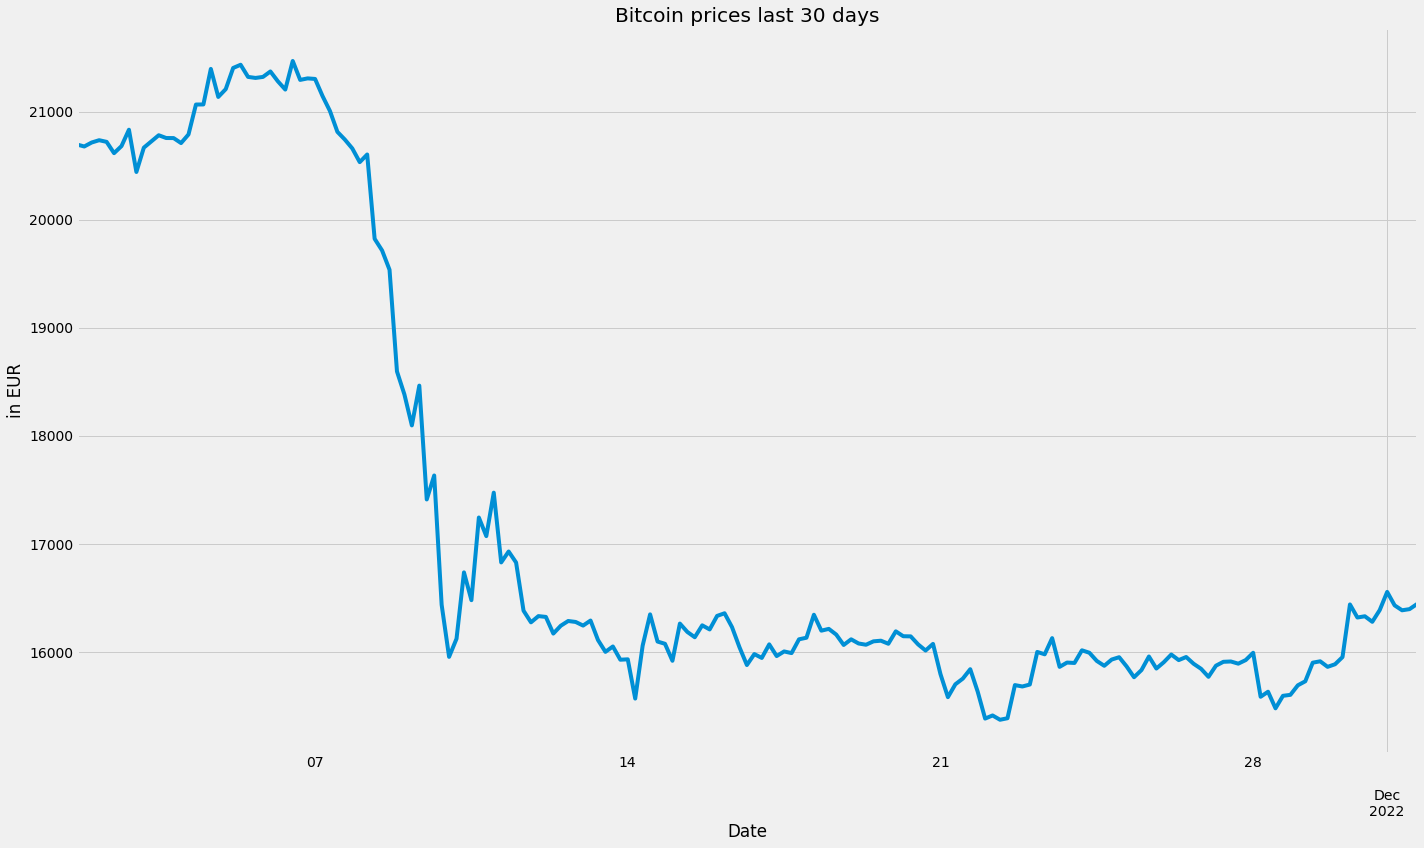

In [10]:
#https://thepythonyouneed.com/how-to-get-bitcoin-price-using-python

btc_prices = pd.read_json("https://api.coingecko.com/"\
                          "api/v3/coins/bitcoin/ohlc"\
                          "?vs_currency=eur&days=30")
btc_prices.columns = ["date","open", 
                      "high", "low", 
                      "close"]
btc_prices["date"] = pd.to_datetime(btc_prices["date"],
                                    unit="ms")
btc_prices.set_index("date", inplace=True)
btc_prices.close.plot(figsize=(20,12),
                 title="Bitcoin prices last 30 days",
                 xlabel="Date",
                 ylabel="in EUR", 
                 grid=True)
tight_layout()

In [19]:
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
import pandas as pd


#players  =>  10K   OFC  <=> [10K  MM   magic    ]
#             NFT  <=        [10K       OFCtokens]
def MarketMakers(T): #, OFCVALUE):
    
    #ofc_prices = pd.read_json("https://api.binance.com/api/v3/exchangeInfo")
    #print(btc_prices) #.columns = ["date","open", 
                      #"high", "low", 
                      #"close"]
#btc_prices["date"] = pd.to_datetime(btc_prices["date"],
#                                    unit="ms")
#btc_prices.set_index("date", inplace=True)
#btc_prices.close.plot(figsize=(20,12),
#                 title="Bitcoin prices last 30 days",
#                 xlabel="Date",
#                 ylabel="in EUR", 
#                 grid=True)
#tight_layout()
    
    
    url = 'https://api1.binance.com'
    api_call = '/api/v3/ticker/price'
    headers = {'content-type': 'application/json'} #,            'X-MBX-APIKEY': api_key}
    response = requests.get(url + api_call, headers=headers)
    response = json.loads(response.text)
    df = pd.DataFrame.from_records(response)
    df.head()
    #OFCVALUE=response[2]
    
    
    
    return OFCVALUE

In [20]:
import requests
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
import pandas as pd
#api_key = os.environ['BCL-Key']
#api_secret = os.environ['BCL-Secret']

url = 'https://api1.binance.com'
# for US users# url = https://api.binance.us
api_call = '/api/v3/ticker/price'
headers = {'content-type': 'application/json'} #,            'X-MBX-APIKEY': api_key}
response = requests.get(url + api_call, headers=headers)
response = json.loads(response.text)
df = pd.DataFrame.from_records(response)
df.head()
#print(response)

,symbol,price
0,ETHBTC,0.07485700
1,LTCBTC,0.00452000
2,BNBBTC,0.01722700
3,NEOBTC,0.00040200
4,QTUMETH,0.00172000


In [27]:
prices = pd.read_json("https://api.binance.com/api/v3/exchangeInfo")

prices.columns=["col0","col1","col2","col3","col4"]
print(prices)

ValueError: All arrays must be of the same length

In [2]:
#from simulation import simulator
from typing import List
import numpy as np
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

def simulate(df: dict) -> List[List[float]]:
    times: int = df['times']
    period: int = df['period']

    prices = np.zeros((times, period))

    fig = plt.figure()

    print('Now simulating...')
    for i in range(0, times):
        sim = simulator.Simulator(df)
        # generate productivity
        sim.calc_productivity()
        # generate utility 
        sim.calc_utility()

        # simulate price
        for t in range(0, period):
            sim.calc_userbase_and_threshold(t)
            sim.calc_aggregate_transaction_need(t)
            sim.calc_price(t)

        prices[i] = sim.price
        plt.plot(sim.price)

    plt.title('Utility Token Price Per Time Point')
    plt.xlabel('time')
    plt.ylabel('price')
    fig.savefig('glaph.png')

    return prices.tolist()